### Imports

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn
import librosa
import librosa.display
from IPython.display import Audio
import numpy as np
import scipy
import sklearn
import os, requests

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


### Get Our 10 2010's West Coast songs

In [2]:
# 1 minute chunk of each song offset by 1 minute.

x1, sr1 = librosa.load("songs/Anderson .Paak - Bubblin (Official Video).mp3",duration=60,offset=60)
x2, sr2 = librosa.load("songs/Blueface - Thotiana Remix ft. Cardi B (Dir. by ColeBennett).mp3",duration=60,offset=60)
x3, sr3 = librosa.load("songs/Jay Rock - Wow Freestyle ft. Kendrick Lamar.mp3",duration=60,offset=60)
x4, sr4 = librosa.load("songs/Kendrick Lamar - M.A.A.D. City (Feat. MC eiht).mp3",duration=60,offset=60)
x5, sr5 = librosa.load("songs/Rack City - Tyga - Lyrics.mp3",duration=60,offset=60)
x6, sr6 = librosa.load("songs/Roddy Ricch - The Box [Official Audio].mp3",duration=60,offset=60)
x7, sr7 = librosa.load("songs/Shoreline Mafia - Bands [Official Music Video].mp3",duration=60,offset=60)
x8, sr8 = librosa.load("songs/SOB x RBE (DaBoii) - Calvin Cambridge _ Shot by @BGIGGZ ( OFFICIAL VIDEO ).mp3",duration=60,offset=60)
x9, sr9 = librosa.load("songs/Tyler The Creator - Yonkers.mp3",duration=60,offset=60)
x10, sr10 = librosa.load("songs/YG - Suu Whoop.mp3",duration=60,offset=60)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/libros

#### Organize songs into list

In [3]:
songs = [(x1,sr1,'Bubblin'),(x2,sr2,'Thotiana'),(x3,sr3,'Wow Freestyle'),(x4,sr4,'M.A.A.D. City'),(x5,sr5,'Rack City'),(x6,sr6,'The Box'),(x7,sr7,'Bands'),(x8,sr8,'Calvin Cambridge'),(x9,sr9,'Yonkers'),(x10,sr10,'Suu Whoop')]

## Songs:
##### Uncomment to listen

#### "Bubblin"

In [20]:
#Audio(x1,rate=sr1)

#### "Thotiana"

In [21]:
#Audio(x2,rate=sr2)

#### "Wow Freestyle"

In [22]:
#Audio(x3,rate=sr3)

#### "M.A.A.D. City"

In [23]:
#Audio(x4,rate=sr4)

#### "Yonkers"

In [24]:
#Audio(x5,rate=sr5)

#### "Rack City"

In [25]:
#Audio(x6,rate=sr6)

#### "The Box"

In [26]:
#Audio(x7,rate=sr7)

#### "Bands"

In [27]:
#Audio(x8,rate=sr8)

#### "Calvin Cambridge:

In [28]:
#Audio(x9,rate=sr9)

#### "Suu Whoop"

In [29]:
#Audio(x10,rate=sr10)

## Wave Plots

Bubblin:


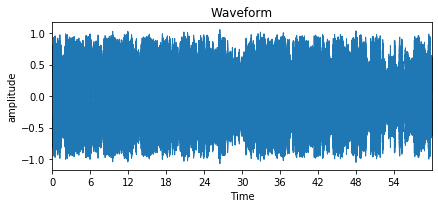

Thotiana:


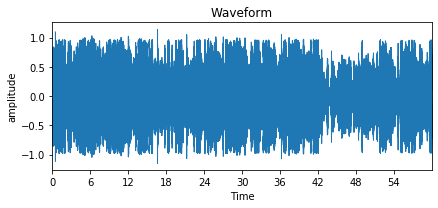

Wow Freestyle:


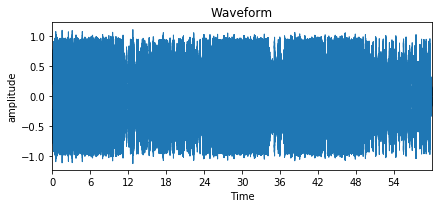

M.A.A.D. City:


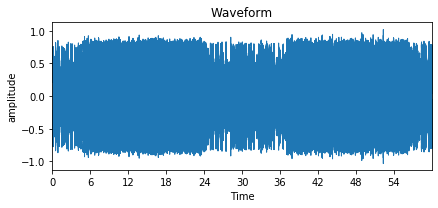

Rack City:


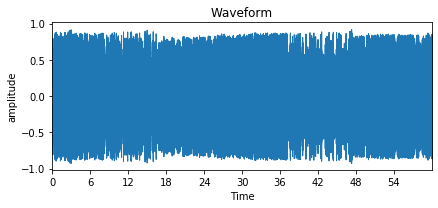

The Box:


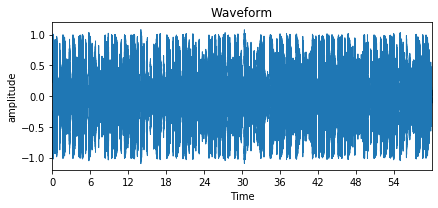

Bands:


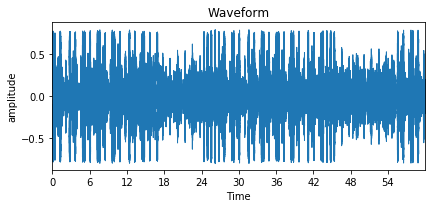

Calvin Cambridge:


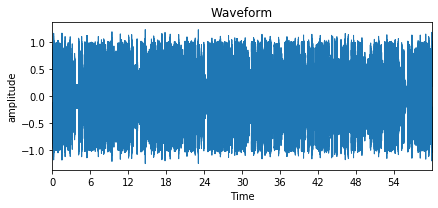

Yonkers:


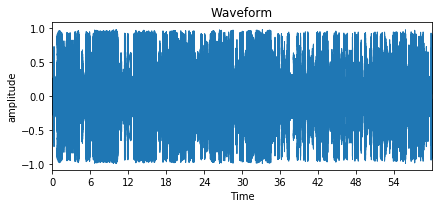

Suu Whoop:


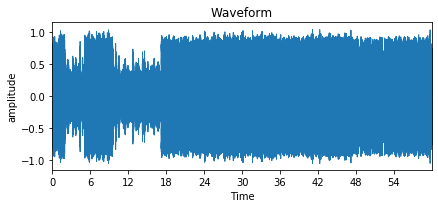

In [14]:
for song in songs:
    x = song[0]
    sr = song[1]
    plt.figure(figsize=(6,3))
    librosa.display.waveplot(x, sr=sr)
    plt.title('Waveform')
    plt.tight_layout()
    plt.ylabel("amplitude")
    print(song[2]+":")
    plt.show()

## Fourier Transform
### With top notes

Bubblin:
Top Note: G#1


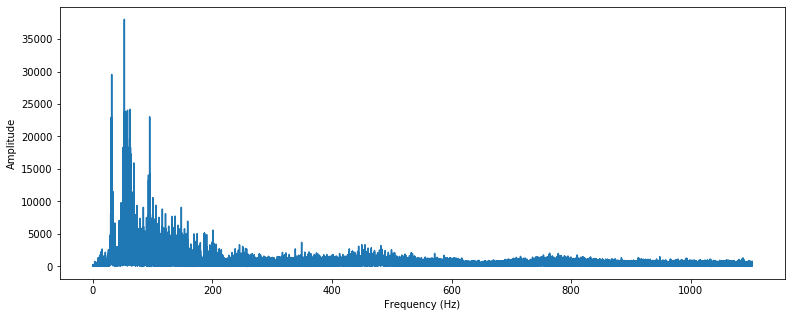

Thotiana:
Top Note: A#0


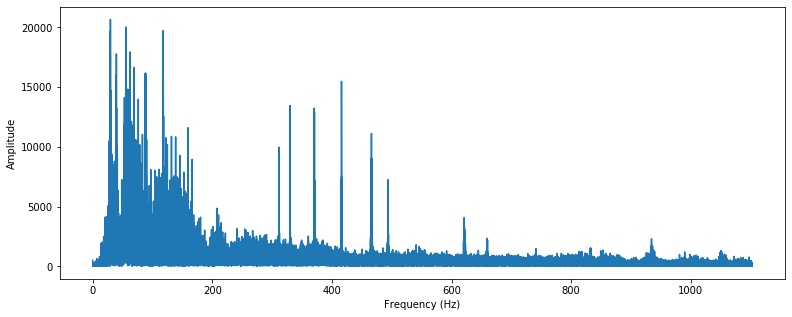

Wow Freestyle:
Top Note: G1


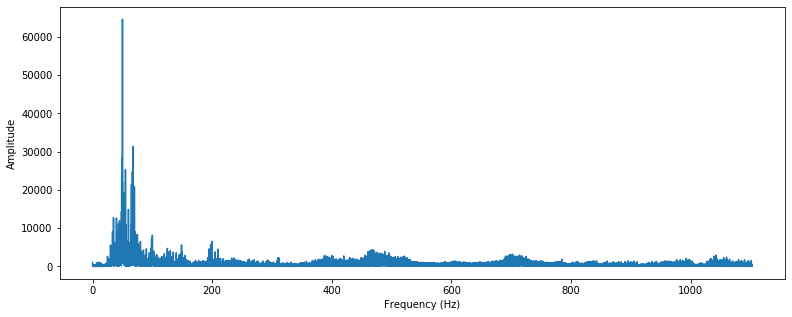

M.A.A.D. City:
Top Note: F10


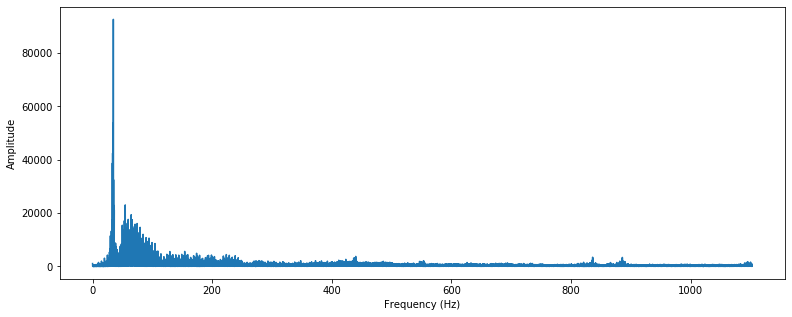

Rack City:
Top Note: A#0


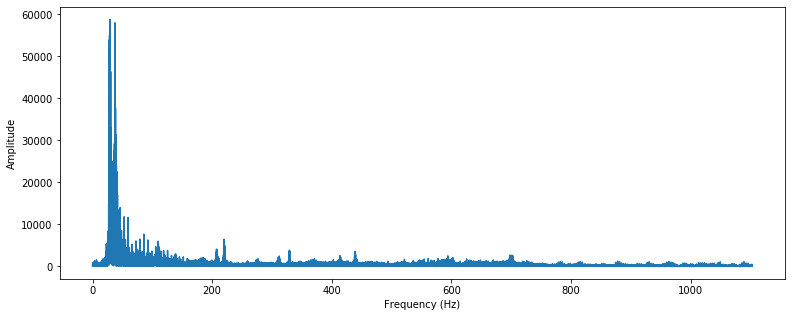

The Box:
Top Note: A#0


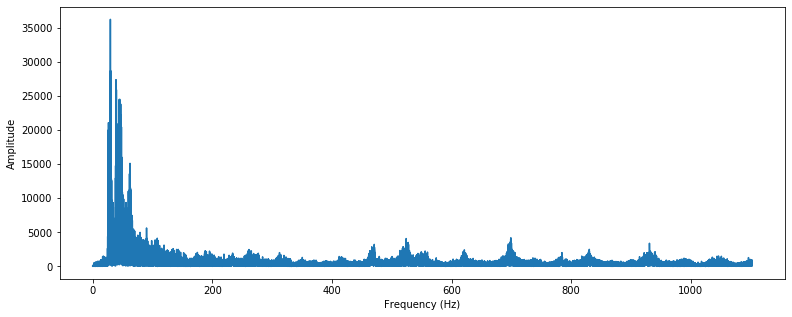

Bands:
Top Note: D1


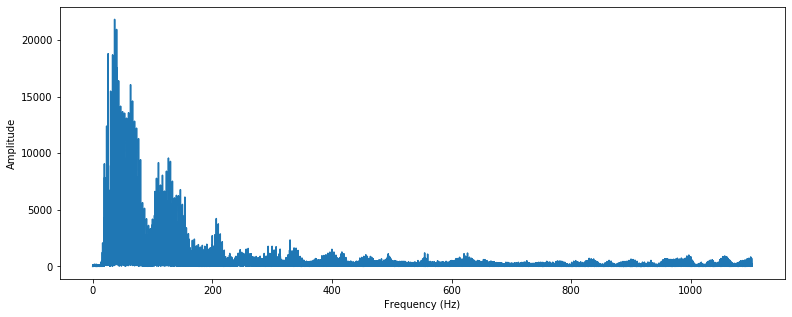

Calvin Cambridge:
Top Note: G1


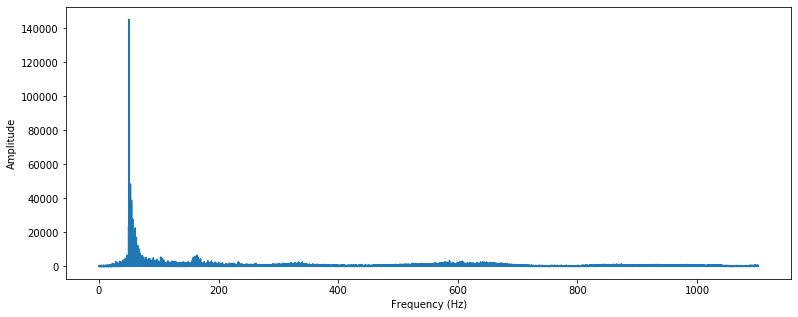

Yonkers:
Top Note: D#1


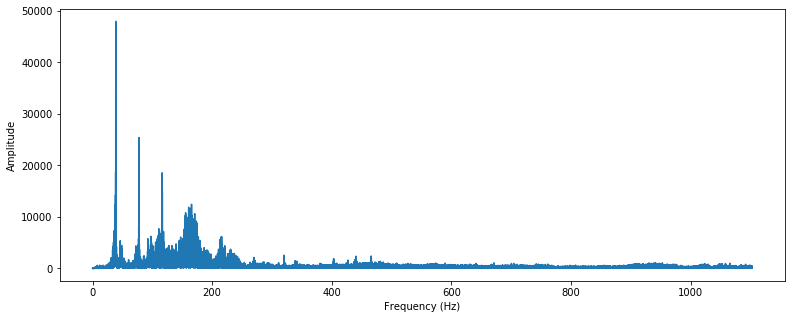

Suu Whoop:
Top Note: F10


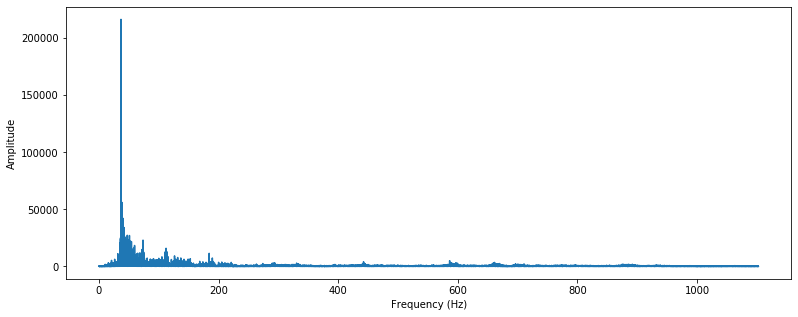

In [30]:
for song in songs:
    x = song[0]
    sr = song[1]
    X = scipy.fft(x)
    X_mag = np.absolute(X)
    # frequency variable
    f = np.linspace(0, sr, len(X_mag)) 
    plt.figure(figsize=(13, 5))
    #get closer chunk of peak (up to 5% of length of f)
    plt.plot(f[:66150], X_mag[:66150])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    #name of each song
    print(song[2]+':')
    max_pos = X_mag.argmax()
    #print the top note for each son
    print('Top Note: ' + librosa.hz_to_note(f[max_pos]))
    plt.show()

## Chroma

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/sparse/lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/sparse/lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):


Bubblin:


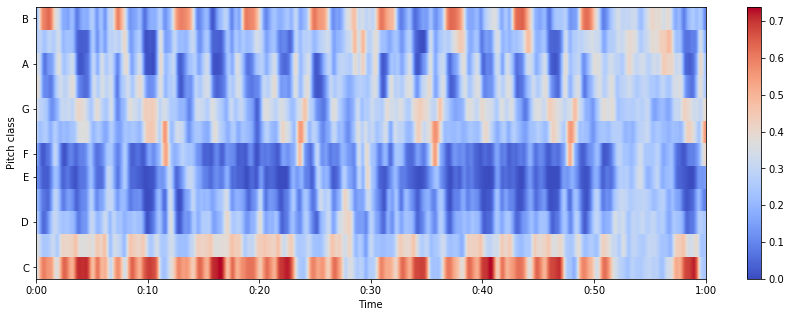

Thotiana:


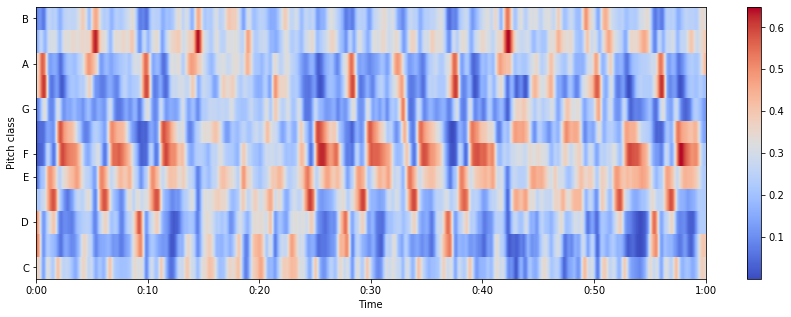

Wow Freestyle:


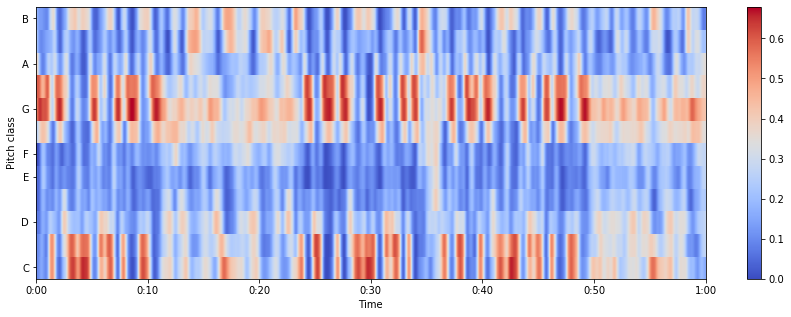

M.A.A.D. City:


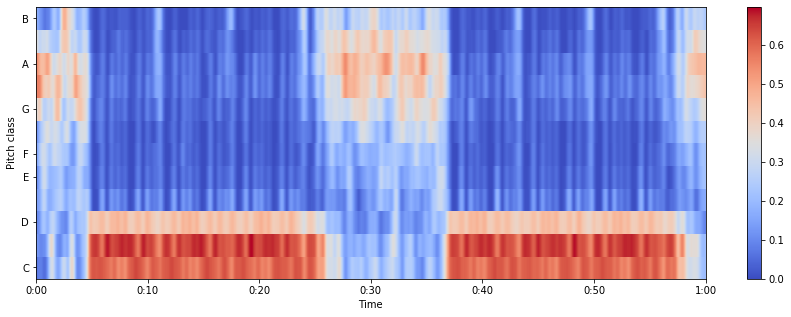

Rack City:


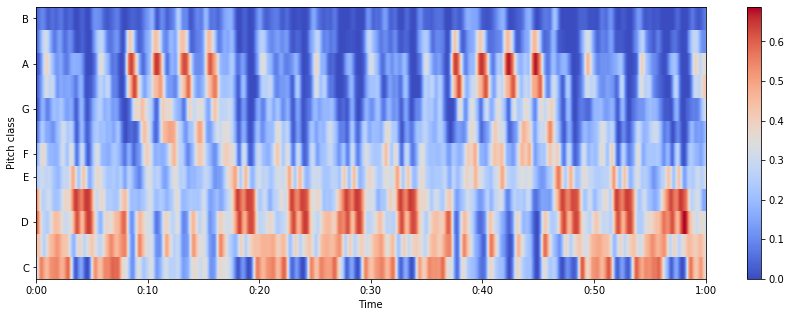

The Box:


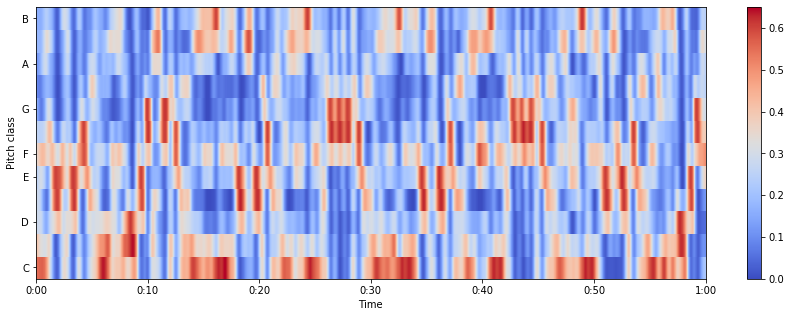

Bands:


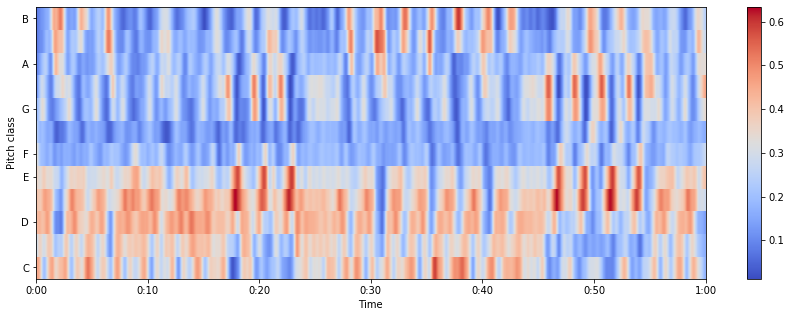

Calvin Cambridge:


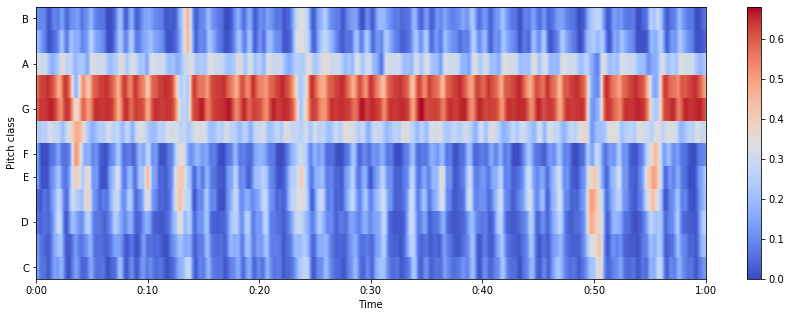

Yonkers:


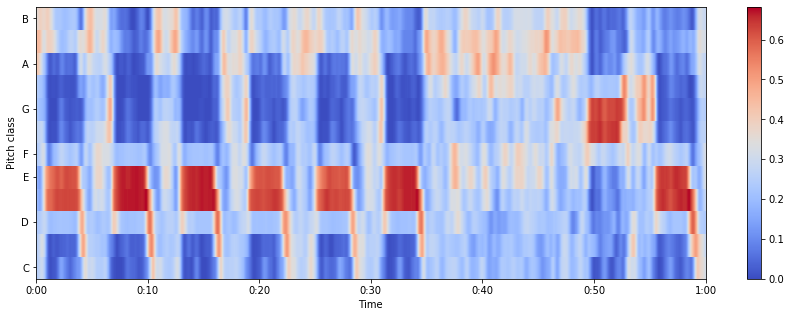

Suu Whoop:


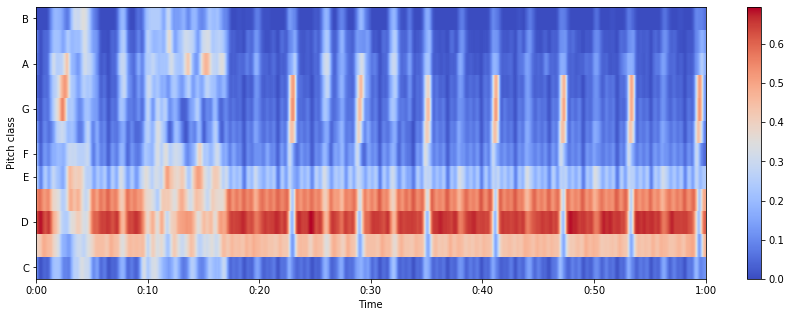

In [16]:
for song in songs:
    x = song[0]
    sr = song[1]
    chromagram = librosa.feature.chroma_cens(x, sr=sr, hop_length=512)
    plt.figure(figsize=(15, 5))
    librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512, cmap='coolwarm')
    print(song[2]+":")
    plt.colorbar()
    plt.show()

## Zero Crossing

In [17]:
for song in songs:
    x = song[0]
    print(song[2]+':')
    print('Total # of Zero Crossings: '+ str(sum(librosa.zero_crossings(x, pad=False)))+'\n')

Bubblin:
Total # of Zero Crossings: 168227

Thotiana:
Total # of Zero Crossings: 112546

Wow Freestyle:
Total # of Zero Crossings: 151094

M.A.A.D. City:
Total # of Zero Crossings: 133036

Rack City:
Total # of Zero Crossings: 71171

The Box:
Total # of Zero Crossings: 115202

Bands:
Total # of Zero Crossings: 129164

Calvin Cambridge:
Total # of Zero Crossings: 149212

Yonkers:
Total # of Zero Crossings: 121492

Suu Whoop:
Total # of Zero Crossings: 74440



## Spectrogram

Bubblin:


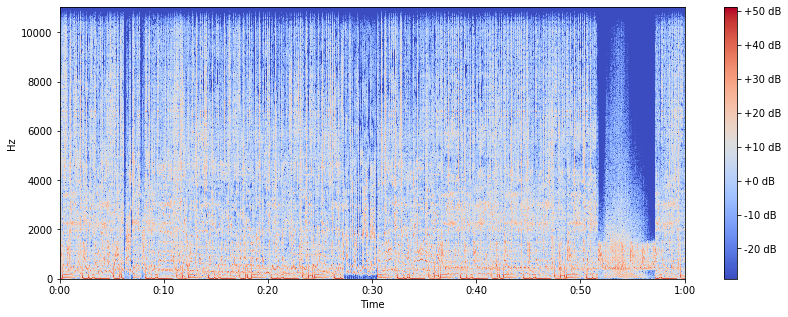

Thotiana:


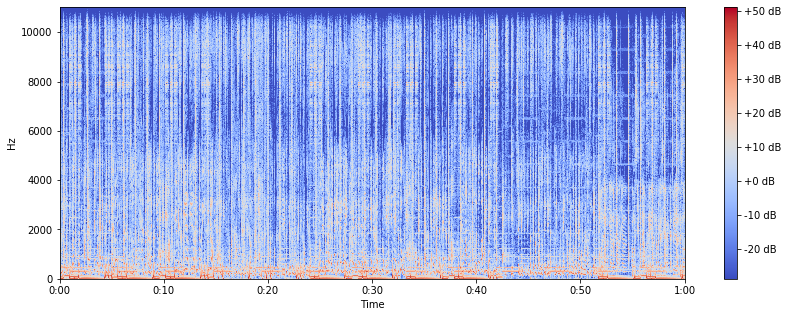

Wow Freestyle:


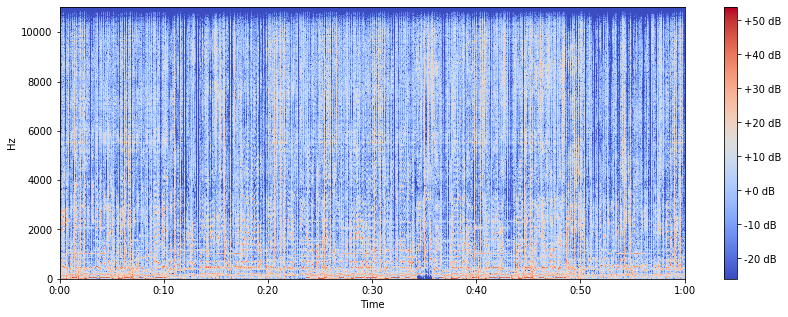

M.A.A.D. City:


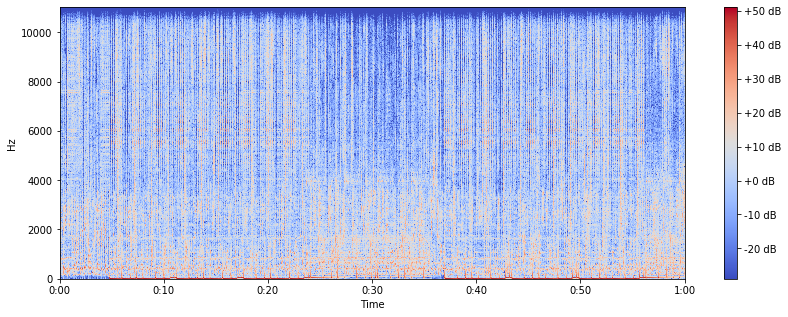

Rack City:


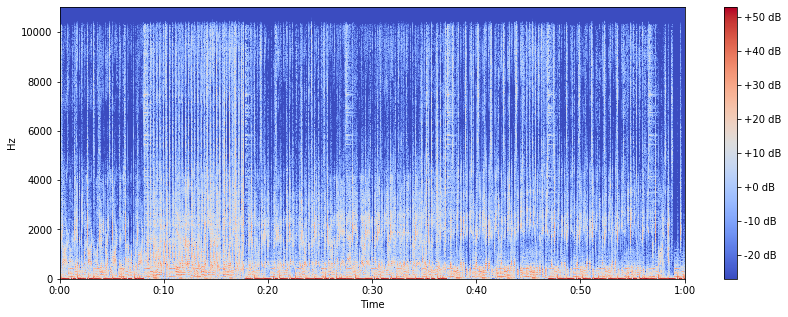

The Box:


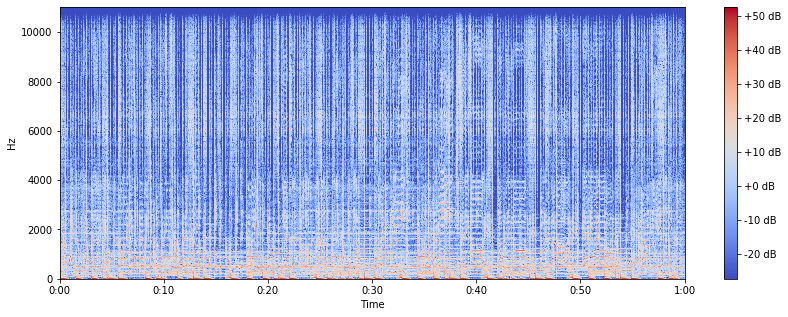

Bands:


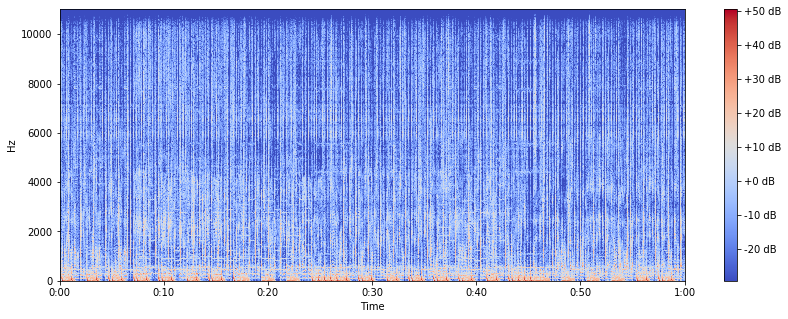

Calvin Cambridge:


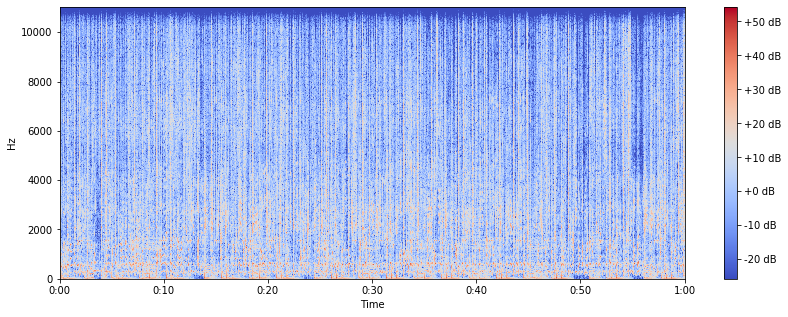

Yonkers:


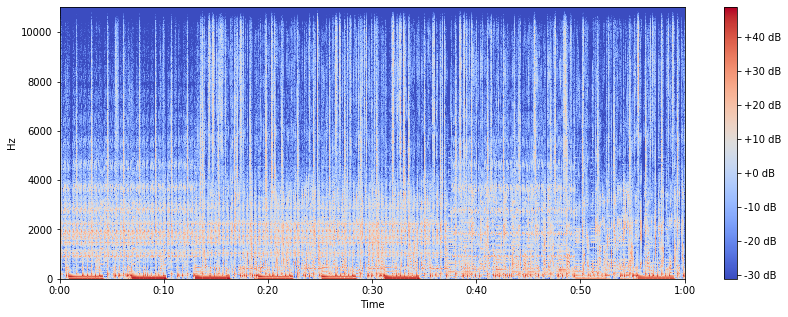

Suu Whoop:


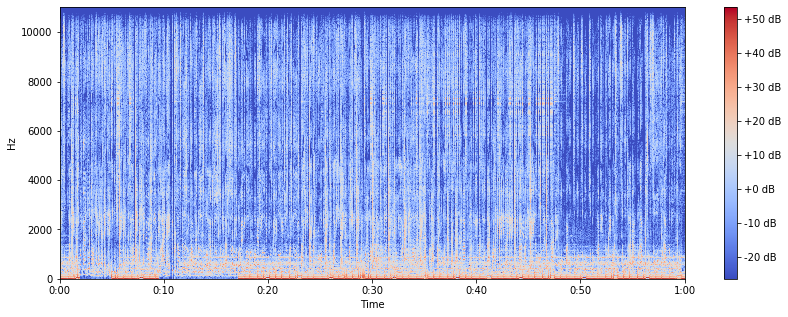

In [18]:
for song in songs:
    x = song[0]
    sr = song[1]
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    print(song[2]+':')
    plt.colorbar(format='%+2.0f dB')
    plt.show()